In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [10]:
# Paso 1: Obtener datos desde la API
response = requests.get(url = "https://www.datos.gov.co/resource/hxd2-uqjm.json")

print(response)
datos = json.loads(response.text)

<Response [200]>


In [ ]:
# Paso 2: Convertir los datos a un DataFrame de Pandas
df = pd.DataFrame(datos)

# Inspeccionamos las primeras filas y la estructura de los datos (HEAD)
print("Primeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
   _   per_odo     instituci_n_universitaria c_digo_programa  \
0  1  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
1  2  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
2  3  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
3  4  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
4  5  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   

                     programa semestre g_nero estrato ciudad_procedencia  \
0  ADMINISTRACION DE EMPRESAS        4      F       2               CALI   
1  ADMINISTRACION DE EMPRESAS        7      M       2               CALI   
2  ADMINISTRACION DE EMPRESAS        1      F       2              VIJES   
3  ADMINISTRACION DE EMPRESAS        6      M       2               CALI   
4  ADMINISTRACION DE EMPRESAS        6      M       2              MOCOA   

  departamento_procedencia  
0          VALLE DEL CAUCA  
1          VALLE DEL CAUCA  
2          VALLE DEL CAUCA  
3          V

In [15]:
# Inspeccionamos las primeras filas y la estructura de los datos (INFO)
print("\nInformación sobre el DataFrame:")
print(df.info())


Información sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _                          1000 non-null   object
 1   per_odo                    1000 non-null   object
 2   instituci_n_universitaria  1000 non-null   object
 3   c_digo_programa            1000 non-null   object
 4   programa                   1000 non-null   object
 5   semestre                   1000 non-null   object
 6   g_nero                     1000 non-null   object
 7   estrato                    992 non-null    object
 8   ciudad_procedencia         992 non-null    object
 9   departamento_procedencia   992 non-null    object
dtypes: object(10)
memory usage: 78.3+ KB
None


In [16]:
# Inspeccionamos las primeras filas y la estructura de los datos (DESCRIBE)
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
           _   per_odo     instituci_n_universitaria c_digo_programa programa  \
count   1000      1000                          1000            1000     1000   
unique  1000         1                             1               2        2   
top     1000  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           53212  DEPORTE   
freq       1      1000                          1000             578      578   

       semestre g_nero estrato ciudad_procedencia departamento_procedencia  
count      1000   1000     992                992                      992  
unique        9      2       6                113                       27  
top           3      M       2               CALI          VALLE DEL CAUCA  
freq        145    697     414                651                      795  


In [17]:
# Paso 3: Preprocesamiento de los Datos
# Filtramos las columnas relevantes para el análisis
df = df[['_', 'per_odo', 'instituci_n_universitaria', 'c_digo_programa', 'programa', 'semestre']]

# Comprobamos si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
_                            0
per_odo                      0
instituci_n_universitaria    0
c_digo_programa              0
programa                     0
semestre                     0
dtype: int64


In [18]:
# Paso 4: Limpieza de los datos
# Elimina filas con valores nulos en las columnas relevantes (si es necesario)
df = df.dropna(subset=['c_digo_programa'])

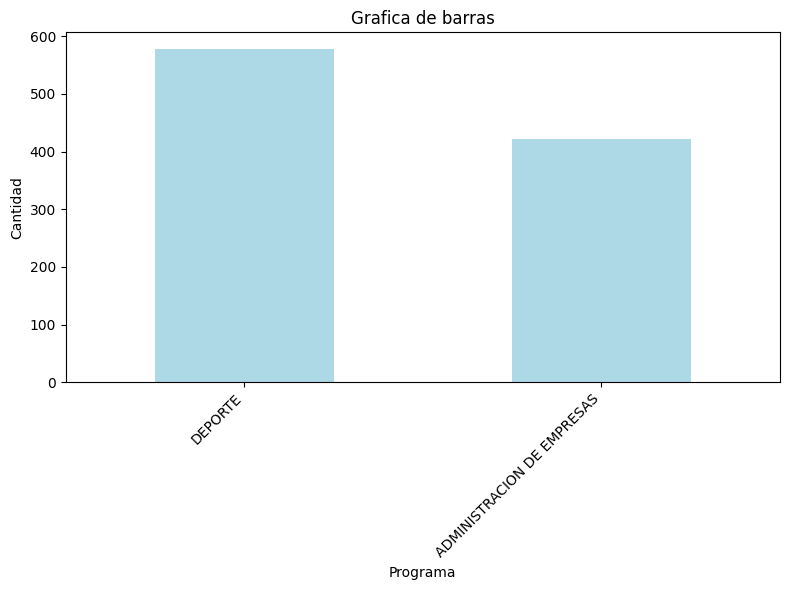

In [42]:
# Paso 5: Visualización de los Datos

# Gráfico de barras para visualizar la columna programa

plt.figure(figsize=(8, 6))
df['programa'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Grafica de barras')
plt.xlabel('Programa')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
# Gráfico de dispersión entre el semestre y el estrato
# Convertimos 'semestre' y 'estrato' a tipo numérico para que sea adecuado para el gráfico
df['semestre'] = pd.to_numeric(df['semestre'], errors='coerce')
df['estrato'] = pd.to_numeric(df['estrato'], errors='coerce')

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='semestre', y='estrato', data=df, hue='g_nero', palette='Set1', s=100, alpha=0.7)

# Títulos y etiquetas
plt.title('Gráfico de Dispersión: Semestre vs Estrato')
plt.xlabel('Semestre')
plt.ylabel('Estrato')
plt.legend(title='Género', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

KeyError: 'estrato'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Los datos proporcionados en formato JSON
data = [
    {
        "_": "1",
        "per_odo": "2023 - 1",
        "instituci_n_universitaria": "ESCUELA NACIONAL DEL DEPORTE",
        "c_digo_programa": "90555",
        "programa": "ADMINISTRACION DE EMPRESAS",
        "semestre": "4",
        "g_nero": "F",
        "estrato": "2",
        "ciudad_procedencia": "CALI",
        "departamento_procedencia": "VALLE DEL CAUCA"
    },
    {
        "_": "2",
        "per_odo": "2023 - 1",
        "instituci_n_universitaria": "ESCUELA NACIONAL DEL DEPORTE",
        "c_digo_programa": "90555",
        "programa": "ADMINISTRACION DE EMPRESAS",
        "semestre": "7",
        "g_nero": "M",
        "estrato": "2",
        "ciudad_procedencia": "CALI",
        "departamento_procedencia": "VALLE DEL CAUCA"
    },
    {
        "_": "3",
        "per_odo": "2023 - 1",
        "instituci_n_universitaria": "ESCUELA NACIONAL DEL DEPORTE",
        "c_digo_programa": "90555",
        "programa": "ADMINISTRACION DE EMPRESAS",
        "semestre": "1",
        "g_nero": "F",
        "estrato": "2",
        "ciudad_procedencia": "VIJES",
        "departamento_procedencia": "VALLE DEL CAUCA"
    },
    {
        "_": "4",
        "per_odo": "2023 - 1",
        "instituci_n_universitaria": "ESCUELA NACIONAL DEL DEPORTE",
        "c_digo_programa": "90555",
        "programa": "ADMINISTRACION DE EMPRESAS",
        "semestre": "6",
        "g_nero": "M",
        "estrato": "2",
        "ciudad_procedencia": "CALI",
        "departamento_procedencia": "VALLE DEL CAUCA"
    }
]

# Convertir los datos en un DataFrame de Pandas
df = pd.DataFrame(data)

# Revisar las primeras filas del DataFrame
print(df.head())

# Paso 1: Gráfico de barras para la distribución de estudiantes por semestre
plt.figure(figsize=(10, 6))
df['semestre'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribución de Estudiantes por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Paso 2: Gráfico de barras para la distribución de géneros
plt.figure(figsize=(8, 6))
df['g_nero'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Estudiantes por Género')
plt.xlabel('Género')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Paso 3: Histograma de la distribución de estratos
plt.figure(figsize=(10, 6))
df['estrato'].astype(int).plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de Estudiantes por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

